# Pizza Place Sales

In [1]:
#import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#to load the four csv files

orders = pd.read_csv(r"C:\Users\Lenovo\OneDrive - Universiti Teknlogi PETRONAS\Asmau\Data\Task 3\pizza_sales\orders.csv")

orders

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


In [3]:
order_details = pd.read_csv(r"C:\Users\Lenovo\OneDrive - Universiti Teknlogi PETRONAS\Asmau\Data\Task 3\pizza_sales\order_details.csv")

order_details

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [4]:
pizzas = pd.read_csv(r"C:\Users\Lenovo\OneDrive - Universiti Teknlogi PETRONAS\Asmau\Data\Task 3\pizza_sales\pizzas.csv")

pizzas 

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


In [5]:
pizza_types = pd.read_csv(r"C:\Users\Lenovo\OneDrive - Universiti Teknlogi PETRONAS\Asmau\Data\Task 3\pizza_sales\pizza_types.csv", encoding ="latin1")

pizza_types

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
5,thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
8,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,ital_cpcllo,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,..."


In [6]:
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [8]:
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [9]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [10]:
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [11]:
pizzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [12]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [13]:
pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [14]:
# to merge the four csv
# Note: orders and order_details have order_id in common
# Note: order_details and pizza have pizza_id in common
# Note: pizzas and pizza_types have pizza_type_id in common

# therfore we are merging at the common parameters

df1= pd.merge(orders, order_details, on= 'order_id', how = 'outer')
df2 = pd.merge(df1, pizzas, on= 'pizza_id', how = 'outer')
df = pd.merge(df2, pizza_types, on= 'pizza_type_id', how= 'outer')

df

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1.0,2015-01-01,11:38:36,1.0,hawaiian_m,1.0,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77.0,2015-01-02,12:22:46,179.0,hawaiian_m,1.0,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146.0,2015-01-03,14:22:10,357.0,hawaiian_m,1.0,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163.0,2015-01-03,16:54:54,389.0,hawaiian_m,1.0,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247.0,2015-01-04,20:55:29,568.0,hawaiian_m,1.0,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
...,...,...,...,...,...,...,...,...,...,...,...,...
48620,21167.0,2015-12-27,17:39:57,48176.0,brie_carre_s,1.0,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48621,21198.0,2015-12-28,15:39:02,48244.0,brie_carre_s,1.0,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48622,21225.0,2015-12-29,13:20:17,48311.0,brie_carre_s,1.0,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48623,21282.0,2015-12-31,12:09:59,48456.0,brie_carre_s,1.0,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."


In [15]:
df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1.0,2015-01-01,11:38:36,1.0,hawaiian_m,1.0,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77.0,2015-01-02,12:22:46,179.0,hawaiian_m,1.0,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146.0,2015-01-03,14:22:10,357.0,hawaiian_m,1.0,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163.0,2015-01-03,16:54:54,389.0,hawaiian_m,1.0,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247.0,2015-01-04,20:55:29,568.0,hawaiian_m,1.0,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48625 entries, 0 to 48624
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  float64
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  float64
 4   pizza_id          48625 non-null  object 
 5   quantity          48620 non-null  float64
 6   pizza_type_id     48625 non-null  object 
 7   size              48625 non-null  object 
 8   price             48625 non-null  float64
 9   name              48625 non-null  object 
 10  category          48625 non-null  object 
 11  ingredients       48625 non-null  object 
dtypes: float64(4), object(8)
memory usage: 4.8+ MB


In [17]:
df.shape

(48625, 12)

In [18]:
df.isna().sum()

order_id            5
date                5
time                5
order_details_id    5
pizza_id            0
quantity            5
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [21]:
#data cleaning of column order_id

df["order_id"].value_counts()

18845.0    21
10760.0    21
13906.0    15
14304.0    15
17464.0    15
           ..
11184.0     1
11805.0     1
12261.0     1
12423.0     1
21282.0     1
Name: order_id, Length: 21350, dtype: int64

In [23]:
#to fill the unknown

df["order_id"] = df["order_id"].fillna("UNKNOWN")
df["order_id"].value_counts()

18845.0    21
10760.0    21
18280.0    15
20163.0    15
14304.0    15
           ..
11184.0     1
11805.0     1
12261.0     1
12423.0     1
21282.0     1
Name: order_id, Length: 21351, dtype: int64

In [24]:
df.isna().sum()

order_id            0
date                5
time                5
order_details_id    5
pizza_id            0
quantity            5
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [25]:
#data cleaning of column quantity

df["quantity"] = df["quantity"].fillna(df["quantity"].mean())

In [26]:
df.isna().sum()

order_id            0
date                5
time                5
order_details_id    5
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [28]:
#data cleaning of column date

df["date"].value_counts()

2015-11-26    261
2015-11-27    259
2015-10-15    258
2015-07-04    233
2015-07-03    207
             ... 
2015-12-27     87
2015-11-22     82
2015-12-29     77
2015-03-22     76
2015-12-30     73
Name: date, Length: 358, dtype: int64

In [29]:
df["date"] = df["date"].fillna("UNKNOWN")

df["date"] = df["date"].replace(["UNKNOWN"], pd.NA)
df["date"].value_counts()

2015-11-26    261
2015-11-27    259
2015-10-15    258
2015-07-04    233
2015-07-03    207
             ... 
2015-12-27     87
2015-11-22     82
2015-12-29     77
2015-03-22     76
2015-12-30     73
Name: date, Length: 358, dtype: int64

In [30]:
df.isna().sum()

order_id            0
date                5
time                5
order_details_id    5
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [31]:
df.dropna(subset= ["date"], inplace=True)

In [32]:
df.isna().sum()

order_id            0
date                0
time                0
order_details_id    0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48624
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  object 
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  float64
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  float64
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(3), object(9)
memory usage: 4.8+ MB


In [34]:
#the datatype of date and time has to be changed from object to datetime

df["date"]= pd.to_datetime(df["date"])
df["time"]= pd.to_datetime(df["time"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48624
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          48620 non-null  object        
 1   date              48620 non-null  datetime64[ns]
 2   time              48620 non-null  datetime64[ns]
 3   order_details_id  48620 non-null  float64       
 4   pizza_id          48620 non-null  object        
 5   quantity          48620 non-null  float64       
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(7)
memory usage: 4.8+ MB


In [35]:
df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1.0,2015-01-01,2026-02-22 11:38:36,1.0,hawaiian_m,1.0,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77.0,2015-01-02,2026-02-22 12:22:46,179.0,hawaiian_m,1.0,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146.0,2015-01-03,2026-02-22 14:22:10,357.0,hawaiian_m,1.0,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163.0,2015-01-03,2026-02-22 16:54:54,389.0,hawaiian_m,1.0,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247.0,2015-01-04,2026-02-22 20:55:29,568.0,hawaiian_m,1.0,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


## Recommended Analyses

1. What is the total revenue/sales?

In [36]:
df["total_price"] = df["quantity"] * df["price"]
total_revenue = df["total_price"].sum()

print("Total Revenue:", total_revenue)

Total Revenue: 817860.05


2. Find the total quantity sold.

In [38]:
total_quantity = df["quantity"].sum()

print("Total Quantity Sold:", total_quantity)

Total Quantity Sold: 49574.0


3. Find the total orders.

In [40]:
total_order = df["order_id"].nunique()
print("Total Orders:", total_order)

Total Orders: 21350


4. How many pizza types do they sell?

In [41]:
pizza_type_count = df["pizza_type_id"].nunique()

print("Number of pizza Types:", pizza_type_count)

Number of pizza Types: 32


5. Find the average price of the pizzas.

In [42]:
average_price = df["price"].mean()

print("Average Pizza Price:", average_price)

Average Pizza Price: 16.494132044426163


6. What are the peak hours of sales?

In [43]:
#to convert time column to hour

df["hour"] = df["time"].dt.hour

df["hour"]

0        11
1        12
2        14
3        16
4        20
         ..
48620    17
48621    15
48622    13
48623    12
48624    16
Name: hour, Length: 48620, dtype: int64

In [51]:
# to group by hour

hourly_sales = df.groupby("hour")["total_price"].sum().reset_index()

hourly_sales

,hour,total_price
0,9,83.00
1,10,303.65
2,11,44935.80
3,12,111877.90
4,13,106065.70
5,14,59201.40
6,15,52992.30
7,16,70055.40
8,17,86237.45
9,18,89296.85


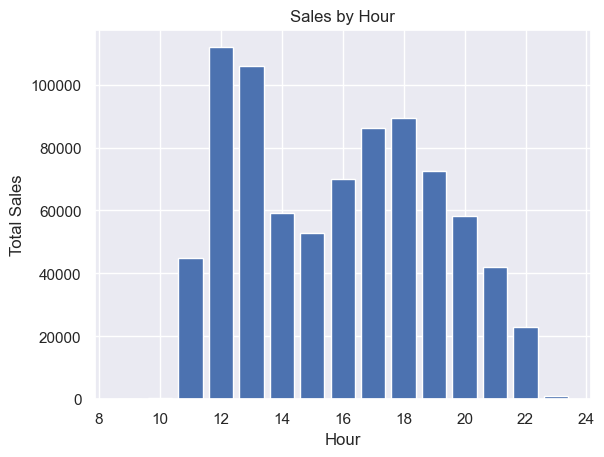

In [55]:
#data visualization 

plt.bar(hourly_sales["hour"], hourly_sales["total_price"])
plt.title("Sales by Hour")
plt.xlabel("Hour")
plt.ylabel("Total Sales")

plt.show()

The peak hours are around 12 and 13 hours

7.	Find the total sales made on each day of the week. Which day of the week is when sales are made the most?

In [63]:
#to convert date column to days 

df["day"] = df["date"].dt.day_name()

df["day"]

0        Thursday
1          Friday
2        Saturday
3        Saturday
4          Sunday
           ...   
48620      Sunday
48621      Monday
48622     Tuesday
48623    Thursday
48624    Thursday
Name: day, Length: 48620, dtype: object

In [76]:
# to group by daily sales

daily_sales = df.groupby("day")["total_price"].sum().sort_values(ascending=True).reset_index()

print(daily_sales)

         day  total_price
0     Sunday     99203.50
1     Monday    107329.55
2    Tuesday    114133.80
3  Wednesday    114408.40
4   Saturday    123182.40
5   Thursday    123528.50
6     Friday    136073.90


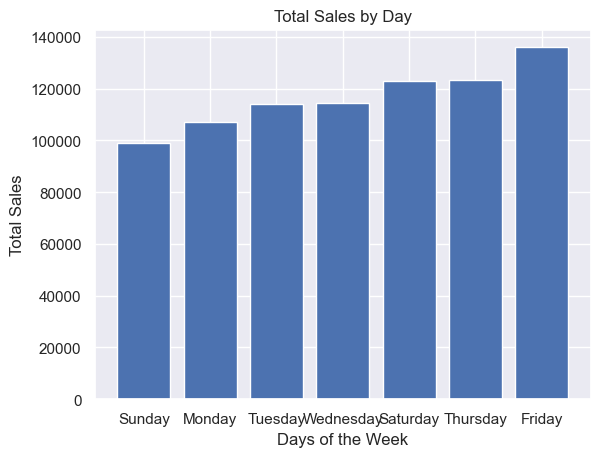

In [80]:
#data visualization 

plt.bar(daily_sales["day"], daily_sales["total_price"])
plt.title("Total Sales by Day")
plt.xlabel("Days of the Week")
plt.ylabel("Total Sales")

plt.show()

The best day of the week which sales were made the most is Friday

8.	Find the top 5 bestselling pizzas.

In [82]:
#to find the bestselling pizzas by quantity bought

bestselling_pizzas = df.groupby("name")["quantity"].sum().sort_values(ascending=False)

bestselling_pizzas

name
The Classic Deluxe Pizza                      2453.0
The Barbecue Chicken Pizza                    2432.0
The Hawaiian Pizza                            2422.0
The Pepperoni Pizza                           2418.0
The Thai Chicken Pizza                        2371.0
The California Chicken Pizza                  2370.0
The Sicilian Pizza                            1938.0
The Spicy Italian Pizza                       1924.0
The Southwest Chicken Pizza                   1917.0
The Big Meat Pizza                            1914.0
The Four Cheese Pizza                         1902.0
The Italian Supreme Pizza                     1884.0
The Vegetables + Vegetables Pizza             1526.0
The Mexicana Pizza                            1484.0
The Napolitana Pizza                          1464.0
The Prosciutto and Arugula Pizza              1457.0
The Spinach and Feta Pizza                    1446.0
The Pepper Salami Pizza                       1446.0
The Italian Capocollo Pizza              

In [84]:
#to find the top 5 from the bestbelling pizzas

top_5 = bestselling_pizzas.head().reset_index()

print("Top_5:", top_5)

Top_5:                          name  quantity
0    The Classic Deluxe Pizza    2453.0
1  The Barbecue Chicken Pizza    2432.0
2          The Hawaiian Pizza    2422.0
3         The Pepperoni Pizza    2418.0
4      The Thai Chicken Pizza    2371.0


9.	Find the sales made in each month. Any trend noticeable?

In [95]:
df["month"] = df["date"].dt.month_name()

monthly_sales = df.groupby("month")["total_price"].sum().sort_values(ascending=True).reset_index()

monthly_sales


,month,total_price
0,October,64027.60
1,September,64180.05
2,December,64701.15
3,February,65159.60
4,June,68230.20
5,August,68278.25
6,April,68736.80
7,January,69793.30
8,November,70395.35
9,March,70397.10


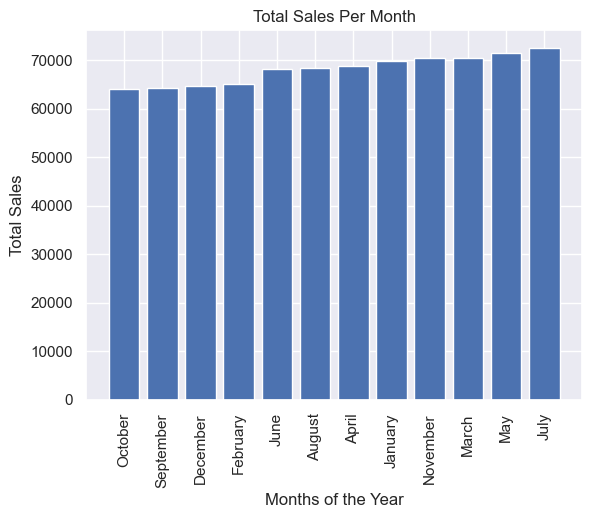

In [96]:
plt.bar(monthly_sales["month"], monthly_sales["total_price"])
plt.title("Total Sales Per Month")
plt.xlabel("Months of the Year"), plt.xticks(rotation=90)
plt.ylabel("Total Sales")

plt.show()

The sales of pizza were increasing from the begining of the year until Mid-year after which the sales decreased and stabilized towards the end of the year. This could be as a results of holidays or season of the year.

10.	Are there pizza types that are not doing well on the menu?

In [99]:
bestselling_pizzas

name
The Classic Deluxe Pizza                      2453.0
The Barbecue Chicken Pizza                    2432.0
The Hawaiian Pizza                            2422.0
The Pepperoni Pizza                           2418.0
The Thai Chicken Pizza                        2371.0
The California Chicken Pizza                  2370.0
The Sicilian Pizza                            1938.0
The Spicy Italian Pizza                       1924.0
The Southwest Chicken Pizza                   1917.0
The Big Meat Pizza                            1914.0
The Four Cheese Pizza                         1902.0
The Italian Supreme Pizza                     1884.0
The Vegetables + Vegetables Pizza             1526.0
The Mexicana Pizza                            1484.0
The Napolitana Pizza                          1464.0
The Prosciutto and Arugula Pizza              1457.0
The Spinach and Feta Pizza                    1446.0
The Pepper Salami Pizza                       1446.0
The Italian Capocollo Pizza              

In [103]:
#picking the last 10 on the list

poorselling_pizzas = bestselling_pizzas.tail(10)

poorselling_pizzas

name
The Green Garden Pizza          997.0
The Chicken Alfredo Pizza       987.0
The Italian Vegetables Pizza    981.0
The Chicken Pesto Pizza         973.0
The Spinach Pesto Pizza         970.0
The Soppressata Pizza           961.0
The Spinach Supreme Pizza       950.0
The Calabrese Pizza             937.0
The Mediterranean Pizza         934.0
The Brie Carre Pizza            490.0
Name: quantity, dtype: float64